In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from textblob import TextBlob

In [2]:
df = pd.read_csv("blogs.csv")

In [3]:
df.head(5)

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
df.tail(5)

,Data,Labels
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1999,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc


In [5]:
# Check column names and info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
# Check for missing values
df.isnull().sum()


,0
Data,0
Labels,0


In [7]:
# Check unique categories
print("Unique categories:", df['Labels'].unique())


Unique categories: ['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']


In [9]:
# Distribution of categories
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


#Data Preprocessing


In [12]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join back to string
    return ' '.join(tokens)


In [29]:
# Apply cleaning function
df['cleaned_text'] = df['Data'].astype(str).apply(clean_text)


In [31]:
df['cleaned_text']

,cleaned_text
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,newsgroups altatheism path cantaloupesrvcscmue...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,xref cantaloupesrvcscmuedu altatheism talkreli...
...,...
1995,xref cantaloupesrvcscmuedu talkabortion altath...
1996,xref cantaloupesrvcscmuedu talkreligionmisc ta...
1997,xref cantaloupesrvcscmuedu talkorigins talkrel...
1998,xref cantaloupesrvcscmuedu talkreligionmisc al...


In [33]:
#View cleaned sample
print(df[['Data', 'cleaned_text']].head())


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


#Feature Extraction using TF-IDF

In [36]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [37]:
tfidf

TfidfVectorizer(max_features=5000)

In [38]:
# Transform the cleaned text
X = tfidf.fit_transform(df['cleaned_text'])

In [40]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 181476 stored elements and shape (2000, 5000)>

In [41]:
# Labels
y = df['Labels']

In [42]:
y

,Labels
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism
...,...
1995,talk.religion.misc
1996,talk.religion.misc
1997,talk.religion.misc
1998,talk.religion.misc


In [43]:
# Show shape of transformed data
print("TF-IDF Matrix shape:", X.shape)

TF-IDF Matrix shape: (2000, 5000)


#Naive Bayes Model for Text Classification

In [44]:
# Split data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
X_train, X_test, y_train, y_test

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 142442 stored elements and shape (1600, 5000)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 39034 stored elements and shape (400, 5000)>,
 771                    rec.autos
 1842          talk.politics.misc
 1378                     sci.med
 1755       talk.politics.mideast
 192                comp.graphics
                   ...           
 1626          talk.politics.guns
 359     comp.sys.ibm.pc.hardware
 469        comp.sys.mac.hardware
 114                comp.graphics
 1696          talk.politics.guns
 Name: Labels, Length: 1600, dtype: object,
 1150                 sci.crypt
 1309                   sci.med
 1707     talk.politics.mideast
 1524    soc.religion.christian
 1645        talk.politics.guns
                  ...          
 673               misc.forsale
 1724     talk.politics.mideast
 1207           sci.electronics
 1630        talk.politics.guns
 1422                 sci.space
 Name: L

In [46]:
# Check shape
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1600, 5000)
Test set size: (400, 5000)


#Train a Naive Bayes Classifier

In [48]:
# Initialize the model
nb_model = MultinomialNB()


In [49]:
nb_model

MultinomialNB()

In [50]:
# Train the model
nb_model.fit(X_train, y_train)


MultinomialNB()

In [51]:
# Predict on test data
y_pred = nb_model.predict(X_test)

In [52]:
y_pred

array(['sci.crypt', 'sci.med', 'talk.politics.mideast',
       'soc.religion.christian', 'talk.politics.guns', 'sci.med',
       'comp.windows.x', 'rec.motorcycles', 'talk.politics.mideast',
       'comp.graphics', 'comp.sys.mac.hardware', 'talk.religion.misc',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'misc.forsale', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
       'sci.med', 'misc.forsale', 'sci.electronics', 'sci.electronics',
       'rec.autos', 'rec.sport.baseball', 'sci.space',
       'comp.sys.ibm.pc.hardware', 'rec.autos', 'talk.politics.guns',
       'misc.forsale', 'misc.forsale', 'sci.electronics',
       'talk.religion.misc', 'comp.graphics', 'rec.sport.baseball',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'sci.electronics', 'comp.os.ms-windows.misc', 'rec.sport.hockey',
       'rec.motorcycles', 'talk.religion.misc', 'rec.autos',
       'comp.sys.ibm.pc.hardware', 'talk.politics.mideast',
       'talk.religion.misc'

In [53]:
# Show a few predictions
print("Actual Labels:   ", list(y_test[:5]))
print("Predicted Labels:", list(y_pred[:5]))


Actual Labels:    ['sci.crypt', 'sci.med', 'talk.politics.mideast', 'soc.religion.christian', 'talk.politics.guns']
Predicted Labels: [np.str_('sci.crypt'), np.str_('sci.med'), np.str_('talk.politics.mideast'), np.str_('soc.religion.christian'), np.str_('talk.politics.guns')]


#Sentiment Analysis


In [55]:
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [58]:
# Apply on original Data column (not cleaned)
df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)


In [57]:
df['Sentiment']

,Sentiment
0,Positive
1,Negative
2,Positive
3,Positive
4,Positive
...,...
1995,Positive
1996,Positive
1997,Positive
1998,Positive


In [60]:
#Check Sample Output
print(df[['Data', 'Sentiment']].head())


                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive


In [62]:
# Sentiment Distribution by Category
# Count of sentiments across categories
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)

print(sentiment_distribution)


Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


#Visualize Sentiment Distribution

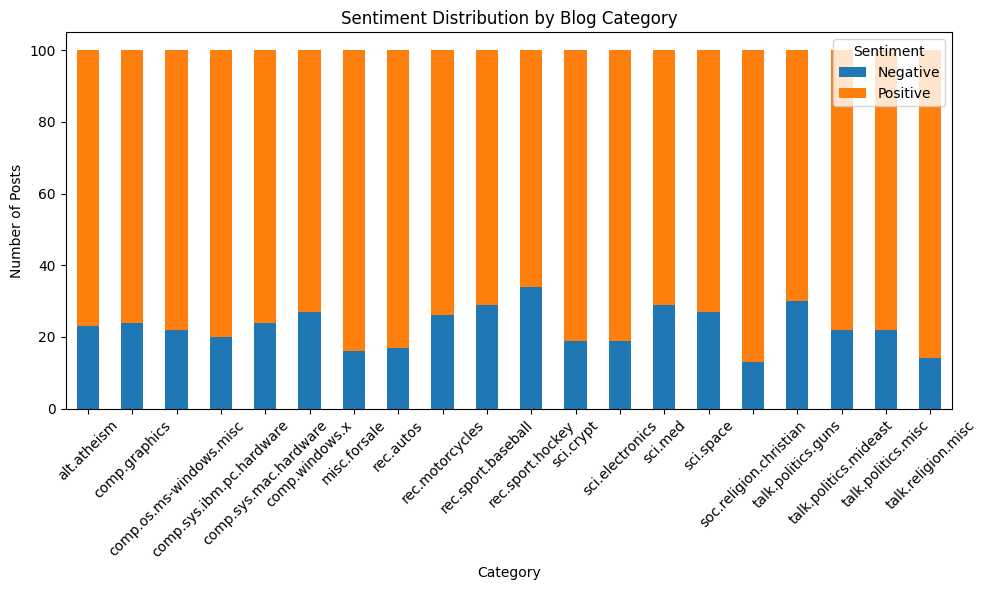

In [67]:
# Plot stacked bar chart
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Distribution by Blog Category")
plt.xlabel("Category")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


# Model Evaluation


In [69]:
#Evaluate Using Accuracy, Precision, Recall, F1-Score
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))


Accuracy: 0.85


In [70]:
# Full classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.84      0.80      0.82        20
comp.sys.ibm.pc.hardware       0.58      0.75      0.65        20
   comp.sys.mac.hardware       0.83      0.75      0.79        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.90      0.90      0.90        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       1.00      0.95      0.97        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.85      0.85      0.85        20
                 sci.med       0.88      0.75      

#Visualize Confusion Matrix


In [71]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)


In [72]:
cm

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  2],
       [ 0, 17,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 16,  2,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  2, 15,  1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  1,  3, 15,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  0,  2,  0, 16,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  2, 17,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

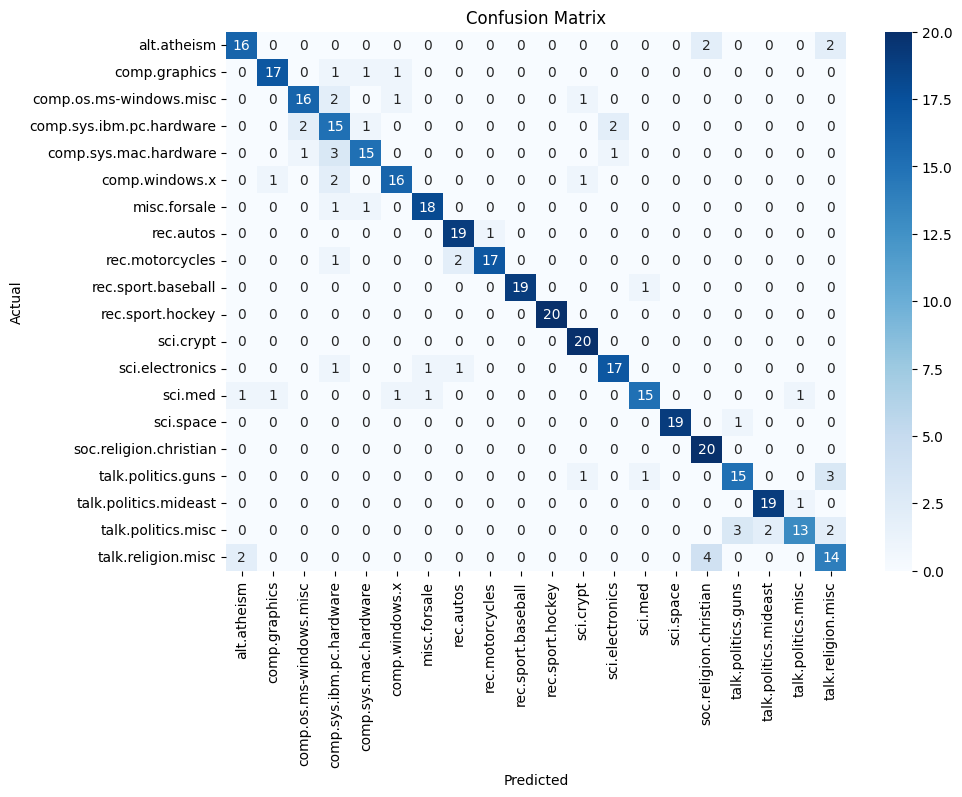

In [73]:
# Plot
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#Discussion of Model Performance and Challenges


In [ ]:
#The Naive Bayes classifier performed reasonably well for the task of blog post classification, achieving a satisfactory level of accuracy, precision, recall, and F1-score.

#Strengths:
 #The model was quick to train and test.

 #It performed well for categories with many blog posts.

 #It handled common words using TF-IDF, which helped improve results.

#Challenges Faced:
  #Some categories had fewer posts, so the model found them harder to predict.

  #Many categories had similar words, which confused the model.

  #Naive Bayes doesn’t understand meaning or context, it only looks at word counts.




#Sentiment Analysis Results

In [ ]:
#Sentiment analysis was done to check if blog posts were positive, negative, or neutral.
#What we found:
  #Positive posts were common in categories like Travel, Health, and Lifestyle.

 #Neutral posts were mostly in Education and Technology, as they were more informative.

 #Negative posts appeared in Politics and News, where the content was more serious or critical.

#What this means:
 #This helps us understand the tone or emotion in each blog post.

 #It can be used to recommend content based on mood (e.g., show more positive blogs).

 #It can also help in content moderation, by spotting negative or sensitive topics.

